In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np


# 1读取数据

In [2]:
#读取数据
df_train=pd.read_csv('cs-training.csv')
df_train#其实第一行完全是可以当索引的 读取数据的时候把第一行当成索引

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
df_train=pd.read_csv('cs-training.csv',index_col='Unnamed: 0')
df_train
##SeriousDlqin2yrs表示90天以上逾期或更差1代表是 0代表否   
#RevolvingUtilizationOfUnsecuredLines 除房地产和汽车贷款等无分期付款债务外，信用卡和个人信用额度的总余额除以信贷限额
#age年龄                       NumberOfTime30-59DaysPastDueNotWorse借款人预期30-59天的次数 但在过去两年内没有更糟糕   
#DebtRatio债务比（每月偿还的债务，赡养费，生活费除以每月的总收入）          #MonthlyIncome每月收入 
#NumberOfOpenCreditLinesAndLoans 公开贷款(如汽车贷款或抵押贷款)和信用额度(如信用卡)的数量
#NumberOfTimes90DaysLate 借款人逾期90天（或以上）的次数
#NumberRealEstateLoansOrLines抵押贷款和房地产贷款的额度（包括房屋净值信贷）
#NumberOfTime60-89DaysPastDueNotWorse借款人逾期60-89天的次数，但在过去两年没有更糟
#NumberOfDependents除自己(配偶、子女等)以外的家庭受养人人数

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# 2数据探索与预处理

## 2.1标签的分布情况探索与可视化

In [4]:
#看一下 SeriousDlqin2yrs的分布情况 
df_train['SeriousDlqin2yrs'].value_counts()#里面的数据分布 139974条是0  10026是1

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

<AxesSubplot:>

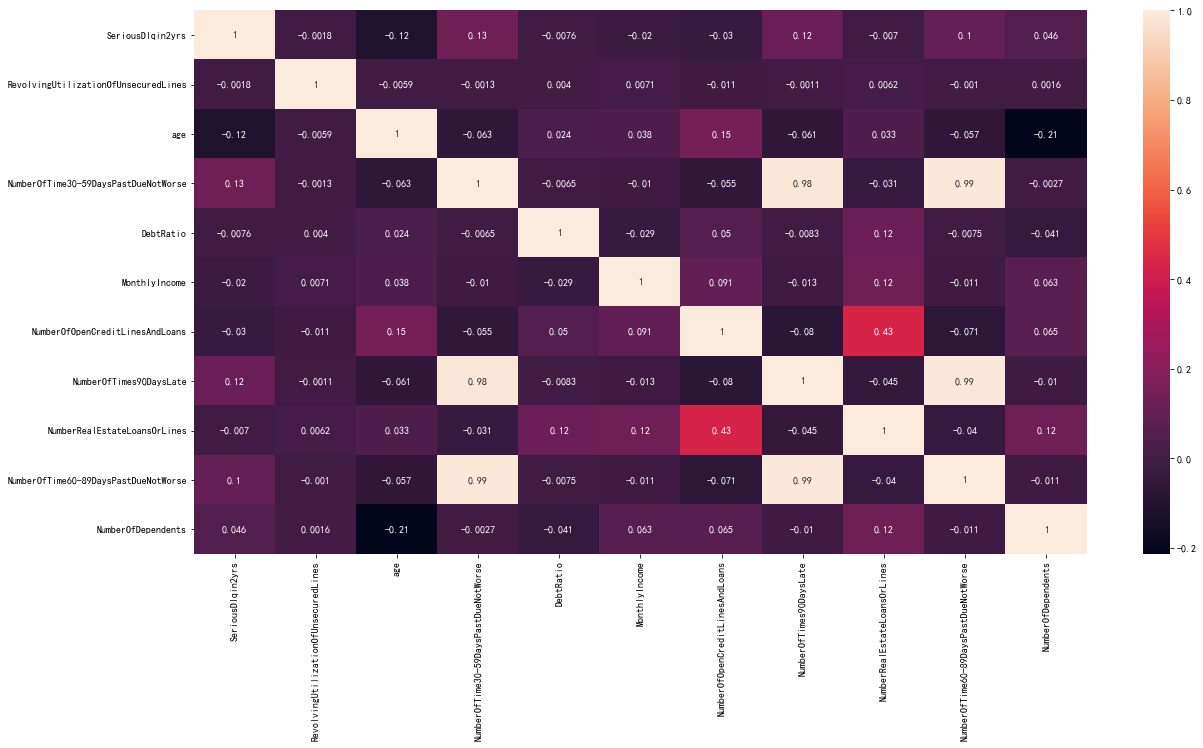

In [5]:
# feature corelation ship
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

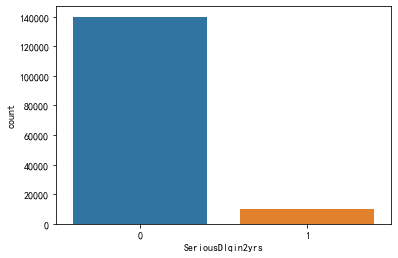

In [5]:
#做一下可视化 
import seaborn as sns
sns.countplot(x='SeriousDlqin2yrs',data=df_train)

In [6]:
#看一下违约的比例
df_train['SeriousDlqin2yrs'].sum()/len(df_train)#这个就是违约的比例

0.06684

## 2.2缺失值的补全

In [7]:
#看看里面数据里面是否有缺失值
df_train.isna().sum()#可以看到 MonthlyIncome 有29731个缺失值      NumberOfDependents 有3924个缺失值   总数据有15万个  这个时候需要填补

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
df_train.mean()#看一下数据的平均数

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [9]:
df_train.median()#这个是中位数  #看看这两个数据的对对比  然后 填充缺失值的打算采用中位数的方式

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [10]:
#填充一下缺失值
df_train['MonthlyIncome']=df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median())
df_train['NumberOfDependents']=df_train['NumberOfDependents'].fillna(df_train['NumberOfDependents'].median())
#填充完之后再看看是否有缺失值
df_train.isna().sum()#这样缺失值就没有了 

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## 2.3数据分箱

In [11]:
#下面开始做数据分箱
#对于age字段，分成6段 [-math.inf, 25, 40, 50, 60, 70,math.inf]
#对于NumberOfDependents（家属人数）字段，分成6段[-math.inf,2,4,6,8,10,math.inf]
#对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse， NumberOfTime60-89DaysPastDueNotWorse， NumberOfTimes90DaysLate，分成10段
#[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
#对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio,MonthlyIncome, NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines 
#分成5段

In [12]:
#对于age字段，分成6段 [-math.inf, 25, 40, 50, 60, 70,math.inf] 
#在做之前 先看看年龄的分布
df_train['age'].value_counts()

49     3837
48     3806
50     3753
63     3719
47     3719
       ... 
101       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64

In [13]:
#按照年龄从小到大来排序
df_train['age'].value_counts().sort_index()

0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 86, dtype: int64

/home/stu_15527388015/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


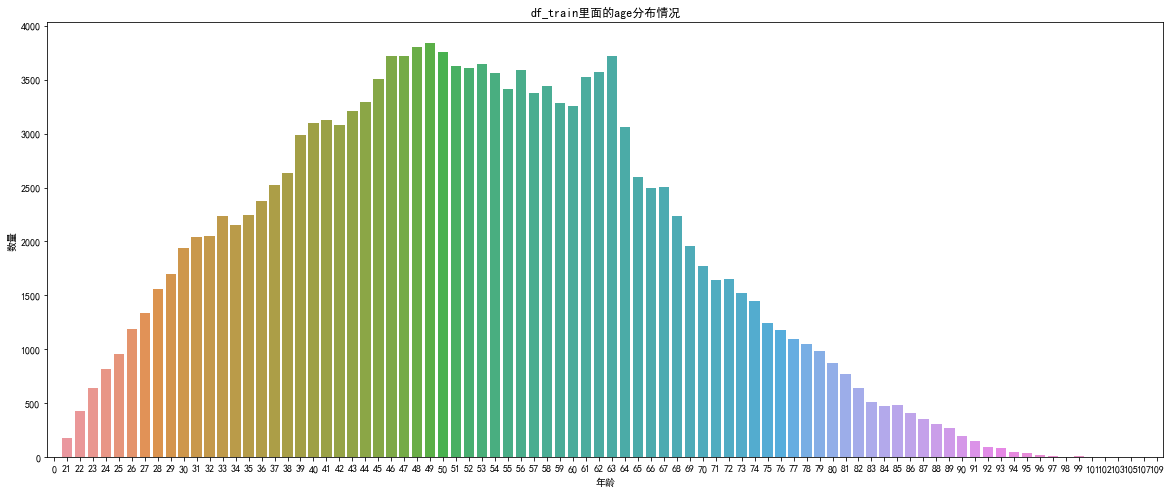

In [14]:
#可视化一下
# plt.bar(df_train['age'].value_counts().sort_index().index,df_train['age'].value_counts().sort_index().values)
plt.figure(figsize=(20,8))
sns.barplot(df_train['age'].value_counts().sort_index().index, df_train['age'].value_counts().sort_index().values)
plt.title("df_train里面的age分布情况")
plt.xlabel("年龄")
plt.ylabel("数量")
plt.show()

In [15]:
#看到这个年龄的分布之后  开始做分箱
age_bins=[-math.inf, 25, 40, 50, 60, 70,math.inf]#这里是分成了6段 0-25 25-40 40-50 50-60 60-70 70-无穷大
df_train['bin_age']=pd.cut(df_train['age'],bins=age_bins)#这个操作对年龄段进行分箱
df_train['bin_age']#这样就按照分箱的方式分好了  比如第一个年龄是45  就被分到了40-50这一箱  注意观察 这里还是左开右闭的操作

1         (40.0, 50.0]
2         (25.0, 40.0]
3         (25.0, 40.0]
4         (25.0, 40.0]
5         (40.0, 50.0]
              ...     
149996     (70.0, inf]
149997    (40.0, 50.0]
149998    (50.0, 60.0]
149999    (25.0, 40.0]
150000    (60.0, 70.0]
Name: bin_age, Length: 150000, dtype: category
Categories (6, interval[float64]): [(-inf, 25.0] < (25.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, inf]]

In [16]:
#其实 还可以把两个都打印出来看看
df_train[['age','bin_age']]#这样分布 一目了然  #有了age这个做基础  其他都可以仿照类似的情况去操作了

,age,bin_age
1,45,"(40.0, 50.0]"
2,40,"(25.0, 40.0]"
3,38,"(25.0, 40.0]"
4,30,"(25.0, 40.0]"
5,49,"(40.0, 50.0]"
...,...,...
149996,74,"(70.0, inf]"
149997,44,"(40.0, 50.0]"
149998,58,"(50.0, 60.0]"
149999,30,"(25.0, 40.0]"


In [17]:
#对于 NumberOfDependents （家属人数）字段，分成6段 [-math.inf,2,4,6,8,10,math.inf]  在做之前 还是对家属字段进行一下探索
df_train['NumberOfDependents'].value_counts()#家属人数为0的最多  还有20个家属的 真是吊 
#这个就不用可视化了 直接分箱了

0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [18]:
dependent_bins=[-math.inf,2,4,6,8,10,math.inf]#这里是把家庭人数分成了 0-2 2-4 4-6 6-8 8-10 10-无穷大 6组
df_train['bin_NumberOfDependents']=pd.cut(df_train['NumberOfDependents'],bins=dependent_bins)#这个操作对家庭人数进行分箱
df_train['bin_NumberOfDependents']#这样就按照分箱的方式分好了

1         (-inf, 2.0]
2         (-inf, 2.0]
3         (-inf, 2.0]
4         (-inf, 2.0]
5         (-inf, 2.0]
             ...     
149996    (-inf, 2.0]
149997    (-inf, 2.0]
149998    (-inf, 2.0]
149999    (-inf, 2.0]
150000    (-inf, 2.0]
Name: bin_NumberOfDependents, Length: 150000, dtype: category
Categories (6, interval[float64]): [(-inf, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, 8.0] < (8.0, 10.0] < (10.0, inf]]

In [19]:
df_train[['NumberOfDependents','bin_NumberOfDependents']]#这样就分好箱了

,NumberOfDependents,bin_NumberOfDependents
1,2.0,"(-inf, 2.0]"
2,1.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
5,0.0,"(-inf, 2.0]"
...,...,...
149996,0.0,"(-inf, 2.0]"
149997,2.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"
149999,0.0,"(-inf, 2.0]"


In [20]:
#对于3种逾期次数，即 NumberOfTime30-59DaysPastDueNotWorse， NumberOfTime60-89DaysPastDueNotWorse， NumberOfTimes90DaysLate，分成10段
#[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
#还是先看下数据的分布
df_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [21]:
df_train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [22]:
df_train['NumberOfTimes90DaysLate'].value_counts() #数据大致探索了 还是要分箱吧

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [23]:
#3）对于3种逾期次数，即 NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
dpd_bins=[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]#这里是分成了 0-1 1-2 2-3 ...8-9 9-正无穷
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse']=pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse']=pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate']=pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)

#查看分箱情况
df_train[['NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime30-59DaysPastDueNotWorse',\
          'NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse',\
          'NumberOfTimes90DaysLate','bin_NumberOfTimes90DaysLate']]#这样就完成了字段的分箱

,NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,bin_NumberOfTimes90DaysLate
1,2,"(1.0, 2.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
2,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
3,1,"(-inf, 1.0]",0,"(-inf, 1.0]",1,"(-inf, 1.0]"
4,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
5,1,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
...,...,...,...,...,...,...
149996,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149997,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149998,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149999,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"


In [24]:
#接下来对其余字段进行一下分箱处理
#对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio,MonthlyIncome, NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines 
#把他们分成5段 采用pd.qcut()函数 按照频率来分一下  q=5表示分成5段  
#duplicates='drop'表示如果数据分布特别不均匀 按照频率分不了5段的时候 合并一下
df_train['bin_RevolvingUtilizationOfUnsecuredLines']=pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop')
df_train['bin_DebtRatio']=pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop')
df_train['bin_MonthlyIncome']=pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans']=pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop')
df_train['bin_NumberRealEstateLoansOrLines']=pd.qcut(df_train['NumberRealEstateLoansOrLines'],q=5,duplicates='drop')

df_train[['bin_RevolvingUtilizationOfUnsecuredLines','RevolvingUtilizationOfUnsecuredLines',\
          'bin_DebtRatio','DebtRatio',\
          'bin_MonthlyIncome','MonthlyIncome',\
          'bin_NumberOfOpenCreditLinesAndLoans','NumberOfOpenCreditLinesAndLoans',\
          'bin_NumberRealEstateLoansOrLines','NumberRealEstateLoansOrLines']]#这样就完成了字段的分箱 分成了5段

,bin_RevolvingUtilizationOfUnsecuredLines,RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,DebtRatio,bin_MonthlyIncome,MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines,NumberRealEstateLoansOrLines
1,"(0.699, 50708.0]",0.766127,"(0.468, 4.0]",0.802982,"(8250.0, 3008750.0]",9120.0,"(12.0, 58.0]",13,"(2.0, 54.0]",6
2,"(0.699, 50708.0]",0.957151,"(-0.001, 0.134]",0.121876,"(-0.001, 3400.0]",2600.0,"(-0.001, 4.0]",4,"(-0.001, 1.0]",0
3,"(0.271, 0.699]",0.658180,"(-0.001, 0.134]",0.085113,"(-0.001, 3400.0]",3042.0,"(-0.001, 4.0]",2,"(-0.001, 1.0]",0
4,"(0.0832, 0.271]",0.233810,"(-0.001, 0.134]",0.036050,"(-0.001, 3400.0]",3300.0,"(4.0, 6.0]",5,"(-0.001, 1.0]",0
5,"(0.699, 50708.0]",0.907239,"(-0.001, 0.134]",0.024926,"(8250.0, 3008750.0]",63588.0,"(6.0, 9.0]",7,"(-0.001, 1.0]",1
...,...,...,...,...,...,...,...,...,...,...
149996,"(0.0192, 0.0832]",0.040674,"(0.134, 0.287]",0.225131,"(-0.001, 3400.0]",2100.0,"(-0.001, 4.0]",4,"(-0.001, 1.0]",1
149997,"(0.271, 0.699]",0.299745,"(0.468, 4.0]",0.716562,"(5400.0, 8250.0]",5584.0,"(-0.001, 4.0]",4,"(-0.001, 1.0]",1
149998,"(0.0832, 0.271]",0.246044,"(4.0, 329664.0]",3870.000000,"(3400.0, 5400.0]",5400.0,"(12.0, 58.0]",18,"(-0.001, 1.0]",1
149999,"(-0.001, 0.0192]",0.000000,"(-0.001, 0.134]",0.000000,"(5400.0, 8250.0]",5716.0,"(-0.001, 4.0]",4,"(-0.001, 1.0]",0


In [25]:
#哪一个字段来看看
df_train['bin_NumberRealEstateLoansOrLines'].value_counts()#这里本来是分成5段 但是 duplicates='drop' 这里就合并了一下 因为数据分布问题
#分成了3段 这样是不合理的  

(-0.001, 1.0]    108526
(1.0, 2.0]        31522
(2.0, 54.0]        9952
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [26]:
df_train['NumberRealEstateLoansOrLines'].value_counts()#按照人数来分 3万人一份  这里0和1 都占了4份 然后合并了

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
32        1
21        1
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [27]:
loans_bins=[-math.inf,0,1,2,3,math.inf]#分成了 负无穷-0  0-1 1-2 2-3 3-正无穷 5段
df_train['bin_NumberRealEstateLoansOrLines']=pd.cut(df_train['NumberRealEstateLoansOrLines'],bins=loans_bins)#这样重新分一下
df_train[['bin_NumberRealEstateLoansOrLines','NumberRealEstateLoansOrLines']]#这样分成了5段貌似更合理一些

,bin_NumberRealEstateLoansOrLines,NumberRealEstateLoansOrLines
1,"(3.0, inf]",6
2,"(-inf, 0.0]",0
3,"(-inf, 0.0]",0
4,"(-inf, 0.0]",0
5,"(0.0, 1.0]",1
...,...,...
149996,"(0.0, 1.0]",1
149997,"(0.0, 1.0]",1
149998,"(0.0, 1.0]",1
149999,"(-inf, 0.0]",0


In [28]:
df_train['bin_NumberRealEstateLoansOrLines'].value_counts()#这个分起来 好像更合理一点

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [29]:
pd.set_option('display.max_columns', 10000)
#现在这个时候再看看df_train
df_train#本来是11个字段 出来要预测的那个值之外 其余的全部做了一个分箱  所以就变成了21个字段

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]"
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]"
149998,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]"
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]"


In [42]:
df_train.columns.values#除了SeriousDlqin2yrs是我们要预测的目标值 所以它没有分享  其余的全部分箱了

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'bin_age', 'bin_NumberOfDependents',
       'bin_NumberOfTime30-59DaysPastDueNotWorse',
       'bin_NumberOfTime60-89DaysPastDueNotWorse',
       'bin_NumberOfTimes90DaysLate',
       'bin_RevolvingUtilizationOfUnsecuredLines', 'bin_DebtRatio',
       'bin_MonthlyIncome', 'bin_NumberOfOpenCreditLinesAndLoans',
       'bin_NumberRealEstateLoansOrLines'], dtype=object)

In [30]:
#统计一下分箱字段
#统计分箱字段
bin_cols=[c for c in df_train.columns.values if c.startswith('bin_')]
print(len(bin_cols))
bin_cols#果然是10个

10


['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

# 3计算WOE与IV值

In [31]:
#下面这几行代码 是下面函数的分布注释
df_train['bin_age']

1         (40.0, 50.0]
2         (25.0, 40.0]
3         (25.0, 40.0]
4         (25.0, 40.0]
5         (40.0, 50.0]
              ...     
149996     (70.0, inf]
149997    (40.0, 50.0]
149998    (50.0, 60.0]
149999    (25.0, 40.0]
150000    (60.0, 70.0]
Name: bin_age, Length: 150000, dtype: category
Categories (6, interval[float64]): [(-inf, 25.0] < (25.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, inf]]

In [32]:
df_train['bin_age'].nunique()# nunique    number of unique

6

In [44]:
df_train['bin_age'].unique()#就是下面这6组

[(40.0, 50.0], (25.0, 40.0], (70.0, inf], (50.0, 60.0], (60.0, 70.0], (-inf, 25.0]]
Categories (6, interval[float64]): [(-inf, 25.0] < (25.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, inf]]

In [46]:
list(df_train['bin_age'].unique())[0]

Interval(40.0, 50.0, closed='right')

In [45]:
#这样就遍历完了 里面的每一个分组
for i in range(df_train['bin_age'].nunique()):
    print(i)
    print(list(df_train['bin_age'].unique())[i])

0
(40.0, 50.0]
1
(25.0, 40.0]
2
(70.0, inf]
3
(50.0, 60.0]
4
(60.0, 70.0]
5
(-inf, 25.0]


In [47]:
#计算一下IV值
#计算IV,衡量一下变量的预测能力
def cal_IV(df, feature, target):
    lst = []
    cols = ['Variable', 'Value', 'All', 'Bad']#变量名称 值 整个情况 bad的情况
    # 对feature字段中的每个分箱的取值进行变量
    for i in range(df[feature].nunique()): # unique代表不同的值，nunique = number of unique 不同值的个数
        # feature字段比如bib_age的第i个分箱取值 
        val = list(df[feature].unique())[i]
        # 统计feature比如 ‘bin_age’， feature 对应的分为值 比如 (40.0, 50.0]， 
        #len(df[df[feature]==val])这个 值 的个数 是一个总数，这个 值 导致target=1的个数 取名Bad 我们这个数据集的target就是那个SeriousDlqin2yrs
        lst.append([feature, val, len(df[df[feature]==val]), len(df[(df[feature]==val) & (df[target]==1)])])    
    #上述几个指标拿出来了以后 做成一个dataFrame    
    data = pd.DataFrame(lst, columns=cols)
    print(data)
cal_IV(df_train,'bin_age','SeriousDlqin2yrs')   

  Variable         Value    All   Bad
0  bin_age  (40.0, 50.0]  35037  2893
1  bin_age  (25.0, 40.0]  32069  3296
2  bin_age   (70.0, inf]  17636   398
3  bin_age  (50.0, 60.0]  34806  2149
4  bin_age  (60.0, 70.0]  27424   952
5  bin_age  (-inf, 25.0]   3028   338


In [36]:
#计算IV,衡量一下变量的预测能力
def cal_IV(df, feature, target):
    lst = []
    cols = ['Variable', 'Value', 'All', 'Bad']#变量名称 值 整个情况 bad的情况
    # 对feature字段中的每个分箱的取值进行变量
    for i in range(df[feature].nunique()): # unique代表不同的值，nunique = number of unique 不同值的个数
        # feature字段的第i个分箱取值
        val = list(df[feature].unique())[i]
        # 统计feature比如 ‘bin_age’， feature 对应的分为值 比如 (40.0, 50.0]， 
        #len(df[df[feature]==val])这个 值 的个数 是一个总数，这个 值 导致target=1的个数 取名Bad 我们这个数据集的target就是那个SeriousDlqin2yrs
        lst.append([feature, val, len(df[df[feature]==val]), len(df[(df[feature]==val) & (df[target]==1)])])    
    #上述几个指标拿出来了以后 做成一个dataFrame    
    data = pd.DataFrame(lst, columns=cols)
    print(data)
    # 筛选bad大于0的情况    #从这里开始就是计算WOE和IV值的公式了
    data = data[data['Bad']>0]  
    #data['Share'] = data['All'] / data['All'].sum() # 这个value所占比例   感觉这里也不需要这个
    #data['Bad Rate'] = data['Bad'] / data['All'] # 这个value导致bad情况，在该value个数的比例  感觉这个不需要
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum() #  Margin Bad  某一项bad占所有bad之和的比例
    data['Margin Good'] = (data['All'] - data['Bad']) / (data['All'] - data['Bad']).sum() 
    # 如果需要避免分子为0，导致-inf, log1p(x) = log(1+x), 这里 NumberOfTime60-89DaysPastDueNotWorse 第8分箱里bad为0
    data['woe'] = np.log(data['Margin Bad'] / data['Margin Good'])
    data['iv']  = ((data['Margin Bad'] - data['Margin Good']) * data['woe'])
    data['iv_sum']  = ((data['Margin Bad'] - data['Margin Good']) * data['woe']).sum()
    print("新生成的data:\n",data)
    data.sort_values(by=['Variable', 'Value'], inplace=True)
    print("排序之后的data：\n",data)
    return (data['iv_sum'].values[0])

cal_IV(df_train,'bin_age','SeriousDlqin2yrs')   

  Variable         Value    All   Bad
0  bin_age  (40.0, 50.0]  35037  2893
1  bin_age  (25.0, 40.0]  32069  3296
2  bin_age   (70.0, inf]  17636   398
3  bin_age  (50.0, 60.0]  34806  2149
4  bin_age  (60.0, 70.0]  27424   952
5  bin_age  (-inf, 25.0]   3028   338
新生成的data:
   Variable         Value    All   Bad  Margin Bad  Margin Good       woe        iv    iv_sum
0  bin_age  (40.0, 50.0]  35037  2893    0.288550     0.229643  0.228343  0.013451  0.240411
1  bin_age  (25.0, 40.0]  32069  3296    0.328745     0.205560  0.469547  0.057841  0.240411
2  bin_age   (70.0, inf]  17636   398    0.039697     0.123151 -1.132145  0.094483  0.240411
3  bin_age  (50.0, 60.0]  34806  2149    0.214343     0.233308 -0.084782  0.001608  0.240411
4  bin_age  (60.0, 70.0]  27424   952    0.094953     0.189121 -0.689003  0.064882  0.240411
5  bin_age  (-inf, 25.0]   3028   338    0.033712     0.019218  0.562024  0.008146  0.240411
排序之后的data：
   Variable         Value    All   Bad  Margin Bad  Margin Go

0.24041120302785982

In [37]:
#计算IV,衡量一下变量的预测能力
def cal_IV(df, feature, target):
    lst = []
    cols = ['Variable', 'Value', 'All', 'Bad']#变量名称 值 整个情况 bad的情况
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, len(df[df[feature]==val]), len(df[(df[feature]==val) & (df[target]==1)])])
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad']>0]
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum() #  Margin Bad  bad占所有value的比例
    data['Margin Good'] = (data['All'] - data['Bad']) / (data['All'] - data['Bad']).sum() 
    data['woe'] = np.log(data['Margin Bad'] / data['Margin Good'])
    data['iv']  = ((data['Margin Bad'] - data['Margin Good']) * data['woe'])
    data['iv_sum']  = ((data['Margin Bad'] - data['Margin Good']) * data['woe']).sum()
    data.sort_values(by=['Variable', 'Value'], inplace=True)
    return (data['iv_sum'].values[0])
#计算每个字段的iv值
for f  in bin_cols:
    print(f,cal_IV(df_train,f,'SeriousDlqin2yrs'))

bin_age 0.24041120302785982
bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.06167337290177645


## 只选择iv>0.1的值，入选的字段又5个
* NumberOfTime30-59DaysPastDueNotWorse
* NumberOfTime60-89DaysPastDueNotWorse
* NumberOfTimes90DaysLate
* bin_RevolvingUtilizationOfUnsecuredLines
* bin_age

# 4根据计算结果再探索一下数据

In [76]:
feature_cols=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse',
              'NumberOfTimes90DaysLate','RevolvingUtilizationOfUnsecuredLines','age']
feature_cols#我们把这5个字段组成一个 list  用 feature_cols 保存

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age']

In [51]:
#下面这几句代码是对RevolvingUtilizationOfUnsecuredLines这个数据的探索 因为bin_RevolvingUtilizationOfUnsecuredLines= 1.0596188771423887  
#大于0.5的就有点过分了 需要再看看咋回事儿
#这个字段的意思是：除房地产和汽车贷款等无分期付款债务外， 信用卡和个人信用额度的总余额除以信贷限额
df_train['bin_RevolvingUtilizationOfUnsecuredLines'].value_counts()

(0.699, 50708.0]    30000
(0.271, 0.699]      30000
(0.0832, 0.271]     30000
(0.0192, 0.0832]    30000
(-0.001, 0.0192]    30000
Name: bin_RevolvingUtilizationOfUnsecuredLines, dtype: int64

In [52]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [55]:
len(df_train[df_train['RevolvingUtilizationOfUnsecuredLines']>1])#这是一个比例 一般是小于1的 但是这个地方大于1的还有3000多人 
#而且最大值是50708  说明这个标签有一定的泄漏的意思   

3321

In [50]:
df_train[['RevolvingUtilizationOfUnsecuredLines','bin_RevolvingUtilizationOfUnsecuredLines']]#先看看分布情况
#这个数字分段是一个比例

,RevolvingUtilizationOfUnsecuredLines,bin_RevolvingUtilizationOfUnsecuredLines
1,0.766127,"(0.699, 50708.0]"
2,0.957151,"(0.699, 50708.0]"
3,0.658180,"(0.271, 0.699]"
4,0.233810,"(0.0832, 0.271]"
5,0.907239,"(0.699, 50708.0]"
...,...,...
149996,0.040674,"(0.0192, 0.0832]"
149997,0.299745,"(0.271, 0.699]"
149998,0.246044,"(0.0832, 0.271]"
149999,0.000000,"(-0.001, 0.0192]"


# 5 WOE编码

In [58]:
df_new = df_train.copy()
df_new

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]"
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]"
149998,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]"
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]"


In [59]:
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [66]:
#下面这几步是下面那几个大函数的分步走
df_woe=df_new.groupby('bin_age').agg({'SeriousDlqin2yrs':['sum', 'count']})
df_woe#这里是分组聚合 sum表示那一组情况出现的个数 比如(-inf, 25.0]这一组出现了3208次 但是它是一个分组  在这个组的人的个数是3028   
#count的和是15000    #因为这里是按照 SeriousDlqin2yrs来聚合的  所以sum的数量就是label=1的数量  就是要违约了  即bad的数量

SeriousDlqin2yrs       
                          sum  count
bin_age                             
(-inf, 25.0]              338   3028
(25.0, 40.0]             3296  32069
(40.0, 50.0]             2893  35037
(50.0, 60.0]             2149  34806
(60.0, 70.0]              952  27424
(70.0, inf]               398  17636

In [67]:
print(df_woe.columns.values,type(df_woe.columns.values))
df_woe.columns=list(map(''.join, df_woe.columns.values))#map函数的作用是把 括号内部前面的function作用在后面中的序列中的每一个元素上
df_woe#这里是把里面的两个字段起一个连接作用

[('SeriousDlqin2yrs', 'sum') ('SeriousDlqin2yrs', 'count')] <class 'numpy.ndarray'>


,SeriousDlqin2yrssum,SeriousDlqin2yrscount
bin_age,,
"(-inf, 25.0]",338,3028
"(25.0, 40.0]",3296,32069
"(40.0, 50.0]",2893,35037
"(50.0, 60.0]",2149,34806
"(60.0, 70.0]",952,27424
"(70.0, inf]",398,17636


In [68]:
df_woe = df_woe.reset_index()#重置一下索引
df_woe

,bin_age,SeriousDlqin2yrssum,SeriousDlqin2yrscount
0,"(-inf, 25.0]",338,3028
1,"(25.0, 40.0]",3296,32069
2,"(40.0, 50.0]",2893,35037
3,"(50.0, 60.0]",2149,34806
4,"(60.0, 70.0]",952,27424
5,"(70.0, inf]",398,17636


In [71]:
df_woe = df_woe.rename(columns={'SeriousDlqin2yrs'+'sum':'bad', 'SeriousDlqin2yrs'+'count':'all'})#更改索引名称
df_woe#这里实际上就是bad和all 有了这些东西之后 就可以去计算WOE编码了

,bin_age,bad,all
0,"(-inf, 25.0]",338,3028
1,"(25.0, 40.0]",3296,32069
2,"(40.0, 50.0]",2893,35037
3,"(50.0, 60.0]",2149,34806
4,"(60.0, 70.0]",952,27424
5,"(70.0, inf]",398,17636


In [89]:
# 计算这些特征的woe# 计算这些特征 
def cal_WOE(df, features, target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum', 'count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()#重新再编码一下
        df_woe = df_woe.rename(columns={target+'sum':'bad', target+'count':'all'})
        # 这里是下面是计算WOE和IV的过程
        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe['Margin Bad'] = df_woe['bad'] / df_woe['bad'].sum() 
        df_woe['Margin Good'] = df_woe['good'] / df_woe['good'].sum()
        df_woe['woe'] = np.log1p(df_woe['Margin Bad'] / df_woe['Margin Good'])
        # 避免重名  df_woe每次循环一个特征都有一个bad和all  按照名字下划线添加到df_woe里去 
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]#先更名名称 再按照特赠那个字段左连接
        df_new = df_new.merge(df_woe, on=f, how='left')
    return df_new
# 计算这些特征的WOE
df_woe = cal_WOE(df_train, bin_cols, 'SeriousDlqin2yrs')
df_woe# bin_cols里面有10个特征  每个特征都增加了 bad all good MarginBad MarginGood woe  所以要增加60个字段

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines,bad_bin_age,all_bin_age,good_bin_age,Margin Bad_bin_age,Margin Good_bin_age,woe_bin_age,bad_bin_NumberOfDependents,all_bin_NumberOfDependents,good_bin_NumberOfDependents,Margin Bad_bin_NumberOfDependents,Margin Good_bin_NumberOfDependents,woe_bin_NumberOfDependents,bad_bin_NumberOfTime30-59DaysPastDueNotWorse,all_bin_NumberOfTime30-59DaysPastDueNotWorse,good_bin_NumberOfTime30-59DaysPastDueNotWorse,Margin Bad_bin_NumberOfTime30-59DaysPastDueNotWorse,Margin Good_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,bad_bin_NumberOfTime60-89DaysPastDueNotWorse,all_bin_NumberOfTime60-89DaysPastDueNotWorse,good_bin_NumberOfTime60-89DaysPastDueNotWorse,Margin Bad_bin_NumberOfTime60-89DaysPastDueNotWorse,Margin Good_bin_NumberOfTime60-89DaysPastDueNotWorse,woe_bin_NumberOfTime60-89DaysPastDueNotWorse,bad_bin_NumberOfTimes90DaysLate,all_bin_NumberOfTimes90DaysLate,good_bin_NumberOfTimes90DaysLate,Margin Bad_bin_NumberOfTimes90DaysLate,Margin Good_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTimes90DaysLate,bad_bin_RevolvingUtilizationOfUnsecuredLines,all_bin_RevolvingUtilizationOfUnsecuredLines,good_bin_RevolvingUtilizationOfUnsecuredLines,Margin Bad_bin_RevolvingUtilizationOfUnsecuredLines,Margin Good_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_RevolvingUtilizationOfUnsecuredLines,bad_bin_DebtRatio,all_bin_DebtRatio,good_bin_DebtRatio,Margin Bad_bin_DebtRatio,Margin Good_bin_DebtRatio,woe_bin_DebtRatio,bad_bin_MonthlyIncome,all_bin_MonthlyIncome,good_bin_MonthlyIncome,Margin Bad_bin_MonthlyIncome,Margin Good_bin_MonthlyIncome,woe_bin_MonthlyIncome,bad_bin_NumberOfOpenCreditLinesAndLoans,all_bin_NumberOfOpenCreditLinesAndLoans,good_bin_NumberOfOpenCreditLinesAndLoans,Margin Bad_bin_NumberOfOpenCreditLinesAndLoans,Margin Good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,Margin Bad_bin_NumberRealEstateLoansOrLines,Margin Good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]",2893,35037,32144,0.288550,0.229643,0.813822,8793,136664,127871,0.87702,0.913534,0.67296,1219,4598,3379,0.121584,0.024140,1.797837,9033,148127,139094,0.900958,0.993713,0.645352,8319,146905,138586,0.829743,0.990084,0.608707,5963,30000,24037,0.594754,0.171725,1.495914,2974,30109,27135,0.296629,0.193857,0.928274,1387,29993,28606,0.138340,0.204367,0.516960,1846,27684,25838,0.184121,0.184591,0.691873,419,3652,3233,0.041791,0.023097,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]",3296,32069,28773,0.328745,0.205560,0.955231,8793,136664,127871,0.87702,0.913534,0.67296,7450,142051,134601,0.743068,0.961614,0.572521,9033,148127,139094,0.900958,0.993713,0.645352,8319,146905,138586,0.829743,0.990084,0.608707,5963,30000,24037,0.594754,0.171725,1.495914,1830,30000,28170,0.182525,0.201252,0.645506,2789,30289,27500,0.278177,0.196465,0.882076,3103,33659,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,"(25.0, 40.0]","(-inf, 

In [ ]:
#

In [90]:
#只筛选那5个我们要的规则的WOE
feature_cols

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age']

In [91]:
# 得到WOE规则 feature, bin, woe
df_bin_to_woe = pd.DataFrame(columns=['features', 'bin', 'woe'])
for f in feature_cols:
    b = 'bin_' + f
    w = 'woe_bin_' + f
    df = df_woe[[w, b]].drop_duplicates()#通过bin和woe_bin来获取到指定列的元素，drop_duplicates()可以去重 这里按照woe的数值去重
    df.columns = ['woe', 'bin']#起个索引的名称
    df['features'] = f#再加上一个字段
    df_bin_to_woe = pd.concat([df_bin_to_woe, df])#然后再进行拼接
df_bin_to_woe

,features,bin,woe
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.520613
251,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",2.774776
423,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",2.902860
1052,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",2.812612
6909,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",2.024184
10822,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",2.077007


# 6开始用逻辑回归来进行建模

## 6.1筛选特征

In [93]:
woe_cols=[c for c in list(df_woe.columns.values) if 'woe' in c ]
print(len(woe_cols))
woe_cols#这里只选特征里面带有WOE的值就行建模  就是上面算出来的那个10个WOE值

10


['woe_bin_age',
 'woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines']

## 6.2数据集切分

In [94]:
#数据集切分
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],test_size=0.2,random_state=33)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120000, 10)
(30000, 10)
(120000,)
(30000,)


In [95]:
y_train.describe()

count    120000.000000
mean          0.066867
std           0.249792
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

## 6.3模型训练与评估

In [96]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
#建好逻辑回归的模型
model=LogisticRegression(random_state=33)
model.fit(x_train ,y_train )#注意这个地方报了一下错误 nan toolarge  是因为有个地方出现了inf和NAN  解决的方法是上面np.log变成np.log1p
y_pred=model.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(roc_auc_score(y_pred,y_test))#Auc的值有点低  一般大于0.8才可以上线

0.9361
0.7711361926102505
